Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [5]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 7 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(TIEMPO_LAVADO)
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

        k=env.now
    if k in tiempo:
        tiempo[k]=tiempo[k]+1
    else:
        tiempo[k]=1
    
    
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Removido  {46%} suciedad vehiculo => Vehiculo-1 
Removido  {50%} suciedad vehiculo => Vehiculo-2 
Removido  {42%} suciedad vehiculo => Vehiculo-3 
Vehiculo [Vehiculo-1] lavado a las 7.00.
Vehiculo [Vehiculo-2] lavado a las 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 7.00.
Llega vehiculo: Vehiculo-6 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Removido  {42%} suciedad vehiculo => Vehiculo-4 
Removido  {82%} suciedad vehiculo => Vehiculo-5 
Vehiculo [Vehiculo-4] lavado a las 14.0

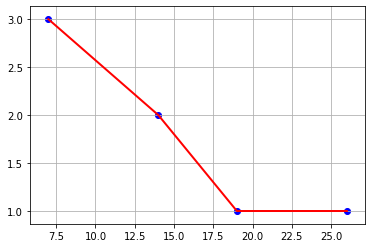

In [6]:
# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Llega vehiculo: Bus-3 a la hora 0.00.
Llega vehiculo: Automovil-3 a la hora 0.00.
Llega vehiculo: Furgoneta-3 a la hora 0.00.
Llega vehiculo: Bus-4 a la hora 0.00.
Llega vehiculo: Automovil-4 a la hora 0.00.
Llega vehiculo: Furgoneta-4 a la hora 0.00.
Llega vehiculo: Bus-5 a la hora 0.00.
Llega vehiculo: Automovil-5 a la hora 0.00.
Llega vehiculo: Furgoneta-5 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
Removido  {46%} suciedad vehiculo => Automovil-1 
Vehic

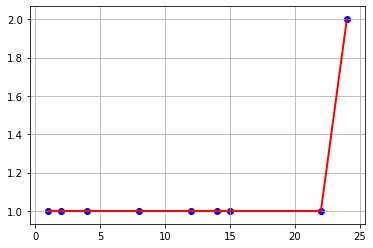

In [7]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        
        automotor=vehiculo.split('-')
        
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
            
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
            
        k=env.now
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' \
              % (random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        
        automotor=vehiculo.split('-')
        
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
            
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
        
        k=env.now
        if k in tiempo:
             tiempo[k]=tiempo[k]+1
        else:
             tiempo[k]=1
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))

print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion del hospital, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el porcentaje de cada edad, en numero de consultorios y el numero de camas o repiradores artificiales y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala (por tipo de paciente: niño, adolescente, adulto y adulto mayor).
- Tiempo promedio total que requiere un paciente para ser atendido desde cero (por cada tipo de paciente).
- Cuántos pacientes de cada tipo se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.

Finalmente generar las simulaciones para el pico de atencion de R0 calculado y R0 predecido la siguiente semana.

### Calcular la media de pacientes por día

In [67]:
import pandas as pd
import numpy as np

url = 'C:/Users/jhonn/Desktop/Jhonny/Universidad/10 Decimo/simulacion/Prueba/Casos covid por provincias.xlsx'
df = pd.read_excel(url)
df = df[df['Provincia'].isin(['Loja'])]

y = list(df.iloc [0, :].loc['19/3/2020':])
x = np.array(range(1,len(y)+1))
y1 = []

for i in range(len(y)-1):
    y1.append(y[i+1]-y[i])
print(y1)

media = np.asarray(y1).mean()

print(media)

[1.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 6.0, 1.0, 5, 0, 0, 0, 0, 0, 0, 7, 15, 7, 3, 6, 4, 3, 13, 1, 12, 7, 11, 12, 4, 0]
3.764705882352941


### Simulación de Hospital

In [90]:
import simpy
import random
import matplotlib.pyplot as pp

NUMERO_CONSULTORIOS = 7
NUMERO_CAMAS = 35
INFECTADOS = 132

PROB_SANO = 60
PROB_FALLECER = 8

MIN_DIAS_INTERNO = 5
MAX_DIAS_INTER = 20
MIN_TIEMPO_ATENCION = 5
MAX_TIEMPO_ATENCION = 20

TIEMPO_SIMULACION_DIAS = 150
TIEMPO_LLEGADA = np.round((60*24)/3.764)

tiempo_espera_consultorio = []
tiempo_espera_cama = []
class Hospital(object):
    def __init__(self, environment,numero_camas, numero_consultorios):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        self.camas = simpy.Resource(environment, numero_camas)
        self.consultorios = simpy.Resource(environment, numero_consultorios)
        print("Numero de camas: ",numero_camas)
        print("Numero de consultorios: ",numero_consultorios)
        
    def consultorio(self, paciente):
        yield self.env.timeout(random.randint(MIN_TIEMPO_ATENCION,MAX_TIEMPO_ATENCION))
    
    def hospitalizaicón(self, paciente):
        #print("El paciente ",paciente," entra a hospitalizacion")
        yield self.env.timeout(random.randint(MIN_DIAS_INTERNO,MAX_DIAS_INTER)*(24*60))
        

def llegada_paciente(env, hospital, paciente):
    inicio = env.now
    
    with hospital.consultorios.request() as consultorio:
        
        yield consultorio
        inicio = env.now - inicio
        tiempo_espera_consultorio.append(inicio)
            
        yield env.process(hospital.consultorio(paciente))

    rnd = random.randint(1,100)
    if rnd > PROB_SANO:
        inicio = env.now 
        with hospital.camas.request() as cama:
                
            yield cama
            inicio = env.now - inicio
            tiempo_espera_cama.append(inicio)   
            yield env.process(hospital.hospitalizaicón(paciente))
              
        
        
def ejecutar_simulacion(env):
    hospital = Hospital(env,NUMERO_CAMAS ,NUMERO_CONSULTORIOS)
    
    for i in range(INFECTADOS):
        #print("Llegó el paciente ",i)
        env.process(llegada_paciente(env, hospital, i))
    paciente = INFECTADOS 
    while True:
        yield env.timeout(TIEMPO_LLEGADA)
        paciente += 1
        env.process(llegada_paciente(env, hospital, paciente))
    
env=simpy.Environment()

env.process(ejecutar_simulacion(env))

env.run(until = TIEMPO_SIMULACION_DIAS*(24*60))

print("Tiempo promedio espera consultorio:  ",np.round(np.asarray(tiempo_espera_consultorio).mean())," Minutos")

print("Tiempo promedio espera cama:  " ,np.round(np.asarray(tiempo_espera_cama).mean()/60)," Horas")

Numero de camas:  35
Numero de consultorios:  7
Tiempo promedio espera consultorio:   23.0  Minutos
Tiempo promedio espera cama:   22.0  Horas


## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 